In [3]:
import networkx as nx
import random
from random import choice
import copy

In [4]:
import matplotlib.pyplot as plt
def show_graph(G):
    options = {
        'node_color': 'black',
        'node_size': 100,
        'width': 3,
    }
    nx.draw(G,**options)
    plt.show()  

In [99]:
# G=nx.complete_graph(5)
G=nx.path_graph(5)
def least_index(main_set,sub_set):
    for n in main_set:
        if n in sub_set:
            return n
def LexBFS(G):
    #fixed S.E.O
    R=[]
    #label queue
    S=[[]]
    #init state 0
    S[0]=list(G.nodes())
    while True:
        #pick vertex v from right most
        v=choice(S[-1])
        S[-1].remove(v)
        R.append(v)
        #pick all neighbors
        w=list(G.neighbors(v))
        length=len(S)
        for i in range(length-1,-1,-1):
            #update label
            inter=set(S[i]).intersection(set(w))
            if list(inter):
                #if intersect, delete old vertex and insert new set
                S[i]=list(set(S[i]).difference(inter))
                S.insert(i+1,list(inter))
        #delete empty set
        S=[s for s in S if s!=[]]
        # print(S)
        if not S:
            break
    #return reverse
    return R[::-1]

seq=LexBFS(G)
seq


[0, 4, 1, 3, 2]

In [101]:
def is_chordal_graph(G,seq):
    # return True if G is chordal graph
    n=len(seq)
    A=dict.fromkeys(seq,[])
    for i in range(0,n-1):
        v=seq[i]
        w=list(G.neighbors(v))
        X=list(set(seq[i+1:]).intersection(set(w)))
        if X:
            u=least_index(seq,X)
            #concatenate X — {u} to A[u]
            X.remove(u)
            A[u]=list(set(A[u]+X))
        inter=list(set(A[v]).intersection(set(w)))
        if A[v]!=inter:
            print(v,A[v],w,inter)
            return False
    return True
# seq=[i for i in range(9)]
is_chordal_graph(G,seq)         

True

In [106]:
def cliques(G,seq):
    # generate all the maximum cliques and return the chromatic number
    chromatic=1
    S=dict.fromkeys(seq,0)
    n=len(seq)
    for i in range(0,n):
        v=seq[i]
        # forward neighbor
        w=list(G.neighbors(v))
        X=list(set(seq[i+1:]).intersection(set(w)))
        n_x=len(X)
        if not w:
            print(w)
        if not X:
            break
        #get smallest vertex in intersect
        u=least_index(seq[i+1:],X)
        S[u]=max(S[u],n_x-1)
        if S[v]<n_x:
            print([v]+X)
            #max k and |X|+1
            chromatic=max(chromatic,n_x+1)
    print(chromatic)
        
cliques(G,seq)


[0, 1]
[4, 3]
[1, 2]
[3, 2]
2


In [107]:
def generate_chordal(n):
    '''
    generate chordal graph with n vertices 
    by construct simplicial elimination order randomly 
    '''
    record_G=[]
    record_H=[]
    G=nx.Graph()
    seq=[i for i in range(n)]
    G.add_nodes_from(seq)
    for i in seq:
        #number of forward vertex
        f_n=n-i-1
        #connect k forward vertex
        k=random.randint(0,f_n)
        #list of forward vertex
        f_w=random.sample(seq[i+1:],k)
        #neighbor vertex
        w=list(G.neighbors(i))
        #existing forward vertex
        exist_f=[j for j in w if j >i]
        #current vertex + existing forward vertex + random picked vertex
        f_w_c=[i]+f_w+exist_f
        f_w_c=list(set(f_w_c))
        #add edges
        H=nx.complete_graph(f_w_c)
        G.add_edges_from(H.edges)
    return G
for i in range(1):
    G=generate_chordal(9)
    if not nx.is_chordal(G):
        print(nx.is_chordal(G))
        # P=G
        # break


In [202]:
# # G=nx.complete_graph(20)
# # is_clique(G)
# G=nx.Graph()
# nx.add_cycle(G, [0, 1, 2, 3,4,5,6,7,8,9,10])
# is_hole(G)
# # len(nx.cycle_basis(G))

True

In [13]:
def is_clique(G):
    if len(list(nx.find_cliques(G)))==1:
        return True
    return False

In [5]:
def is_hole(G):
    # return if G is a hole
    list_cycle=nx.cycle_basis(G)
    # contains only 1 cycle and with length at least 4
    if len(list_cycle)==1 and len(list_cycle[0])>3:
        return True
    return False

In [6]:
def simp_node(G):
    # return the first simplicial node found in G
    for node in G.nodes():
        neighbors = set(G.neighbors(node))
        # print(node)
        # print(neighbors)
        # print([(u,v) for u in neighbors for v in neighbors if u != node and v != node and u!=v])
        if all(G.has_edge(u, v) for u in neighbors for v in neighbors if u != node and v != node and u!=v):
            return True,node
            # print(f"Node {node} is simplicial.")
    return False,-1

In [7]:
def simp_hole(G):
    # for every edge
    for edge in G.edges():
        G_cp=copy.deepcopy(G)
        G_cp.remove_nodes_from(edge)
        # print('edge_picked:',edge)
        # print('node_removed:',G_cp.nodes())
        # if edge disconnect G
        if not nx.is_connected(G_cp):
            # check hole
            for comp in list(nx.connected_components(G_cp)):
                # add edge to component
                comp_uv=comp.union(edge)
                # print('comp+uv:',comp_uv)
                # create subgraph
                G_sub=G.subgraph(comp_uv)
                # if sub graph is a hole
                if is_hole(G_sub):
                    # return True and G with simp_hole removed
                    G.remove_nodes_from(comp)
                    return True, G
            # return True,edge
    return False,G

In [8]:
def simp_hole_v2(G):
    # for every edge
    for edge in G.edges():
        G_cp=copy.deepcopy(G)
        G_cp.remove_nodes_from(edge)
        # print('edge_picked:',edge)
        # print('node_removed:',G_cp.nodes())
        # if edge disconnect G
        if not nx.is_connected(G_cp):
            # check hole
            for comp in list(nx.connected_components(G_cp)):
                # add edge to component
                comp_uv=comp.union(edge)
                # print('comp+uv:',comp_uv)
                # create subgraph
                G_sub=G.subgraph(comp_uv)
                # if sub graph is a hole
                if is_hole(G_sub):
                    # return True and G with simp_hole removed
                    G.remove_nodes_from(comp)
                    return True, G, G_sub
            # return True,edge
    return False,G,G

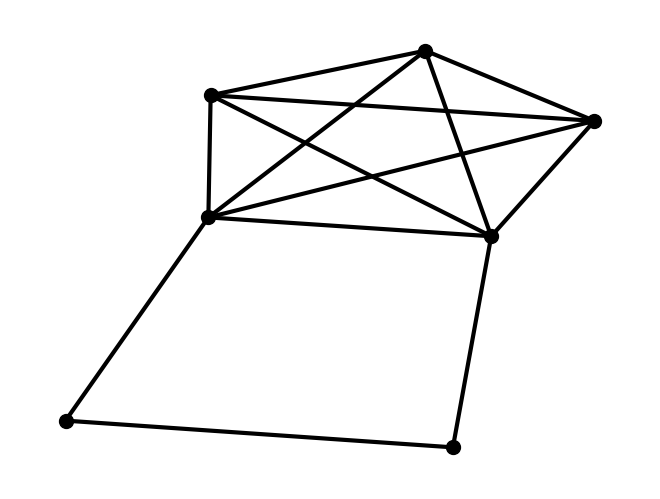

In [9]:
# Build Test graph
# complete graph with a simplicial hole
G=nx.complete_graph(5)
nx.add_cycle(G,[3,4,5,6])
show_graph(G)

In [10]:
# from treelib import Tree,Node
# tree=Tree()
class Node():
    def __init__(self,data,parent=None,left=None,right=None):
        self.parent=parent
        self.left=left
        self.right=right
        self.data=data


In [11]:
def is_us_graph(G):
    # if G is universal signable graph return True
    while(1):
        # stage: 1
        # if G is a clique or a hole, return True 
        if is_clique(G) or is_hole(G):
            return True
        # stage: 2
        # find the first simplicial node
        stat,node=simp_node(G)
        if stat:
            # if exist, remove node, return to stage 1 
            G.remove_node(node)
            continue
        # stage: 3
        # find a simplicial hole 
        # remove hole but keep u,v(connect vertex) in G
        # otherwise return G unchanged
        stat,G=simp_hole(G)
        if stat:
            continue
        return False

In [14]:
# G=nx.complete_graph(20)
is_us_graph(G)

True

In [15]:
def us_graph_tree(G):
    # if G is universal signable graph 
    # return True and decomposition tree
    # build decomposition tree 
    # The first node is the whole graph
    head=Node(copy.deepcopy(G))
    pointer=head
    while(1):
        # stage: 1
        # if G is a clique or a hole, return True 
        # everything should be in the tree, test only at this stage
        if is_clique(G) or is_hole(G):
            return True,head
        # stage: 2
        # find the first simplicial node
        stat,node=simp_node(G)
        if stat:
            # if exist
            cutset=set(G.neighbors(node))
            # new right child
            cutset.add(node)
            G_r=copy.deepcopy(G.subgraph(cutset))
            # create right node
            Node_r=Node(G_r,pointer)
            # remove node, return to stage 1
            G.remove_node(node) 
            # new left child
            G_l=copy.deepcopy(G)
            # create left node
            Node_l=Node(G_l,pointer)
            # add Node to current pointer
            pointer.left=Node_l
            pointer.right=Node_r
            # pointer to the left
            pointer=pointer.left
            continue
        # stage: 3
        # find a simplicial hole 
        # remove hole but keep u,v(connect vertex) in G
        # otherwise return G unchanged
        stat,G,G_sub=simp_hole_v2(G)
        if stat:
            # print("G_sub")
            # show_graph(G_sub)
            Node_l=Node(G,pointer)
            Node_r=Node(G_sub,pointer)
            pointer.left=Node_l
            pointer.right=Node_r
            # pointer to the left
            pointer=pointer.left
            continue
        return False,head

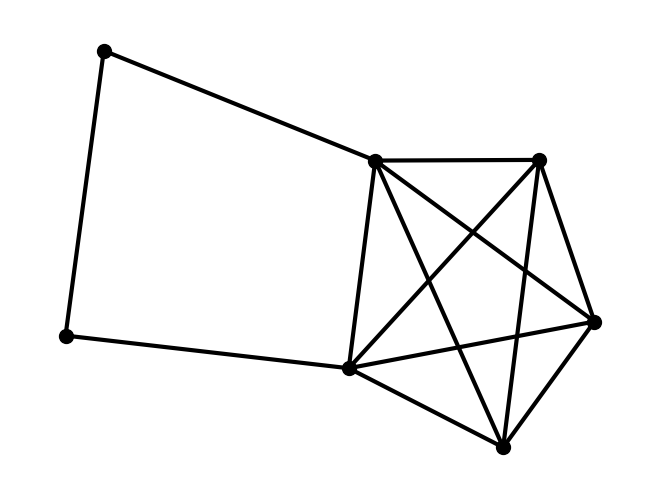

In [16]:
# Build Test graph
# complete graph with a simplicial hole
G=nx.complete_graph(5)
nx.add_cycle(G,[3,4,5,6])
show_graph(G)

In [17]:
stat,head=us_graph_tree(G)

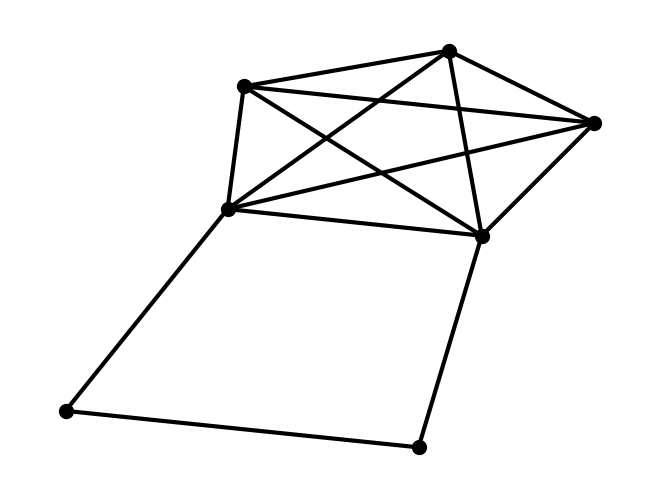

In [18]:
show_graph(head.left.parent.data)

In [19]:
def simple_x(G):
    # return the chromatic number of a simple graph (clique or hole)
    num_nodes=len(G.nodes())
    if is_clique(G):
        return num_nodes
    if is_hole(G):
        # if even cycle
        if num_nodes%2==0:
            return 2
        # if odd cycle
        else:
            return 3
def simple_w(G):
    # return the maximum clique of a simple graph (clique or hole)
    num_nodes=len(G.nodes())
    if is_clique(G):
        return num_nodes
    if is_hole(G):
        return 2

In [22]:
def us_graph_x_w(tree):
    x=1
    w=1
    head=copy.deepcopy(tree)
    while(1):
        # search left tree
        if head.left!=None:
            # if some node does not have right tree
            # return wrong tree struct
            if head.right==None:
                print("wrong tree structure, missing right tree")
                return False,x,w
            # update x and w
            x=max(simple_x(head.right.data),x)
            w=max(simple_w(head.right.data),w)
            # moving pointer to the left
            head=head.left
            continue
        return True,x,w

In [23]:
stat,x,w=us_graph_x_w(head)

In [24]:
stat,x,w

(True, 5, 5)

In [117]:
# def disconnect_G(G,vertex_sets):
#     # if a given set disconnect G
#     # return the components
#     components=[]
#     for vertex_set in vertex_sets:
#         G_cp=copy.deepcopy(G)
#         G_cp.remove_nodes_from(vertex_set)
#         # if vertex_set disconnect G
#         if not nx.is_connected(G_cp):
#             print('vertex_set:',vertex_set)
#             for comp in list(nx.connected_components(G_cp)):
#                 # add vertex_set to component
#                 print(comp)
#                 comp_uv=comp.union(vertex_set)
#                 G_sub=G.subgraph(comp_uv)
#                 # add subgraph to components
#                 components.append(G_sub)
#             # return all the component
#             return True,components  
#     # return False,[]
#     return False,components

In [122]:
stat,components=disconnect_G(G,stable_sets)

vertex_set: {4, 6}
{0, 1, 2, 3}
{5}


In [123]:
len(components)

2

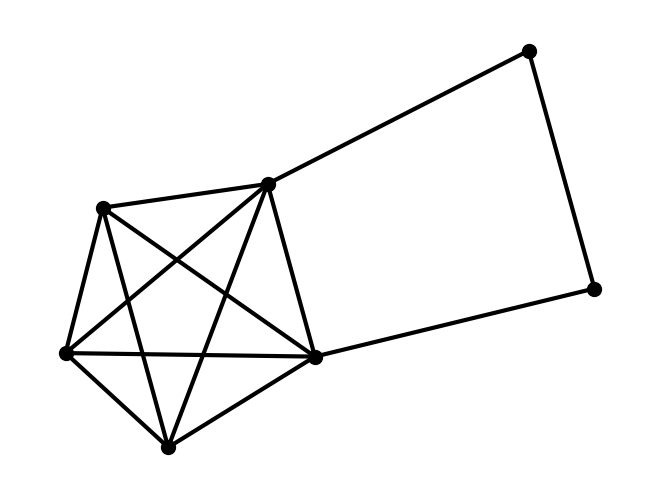

In [124]:
show_graph(G)

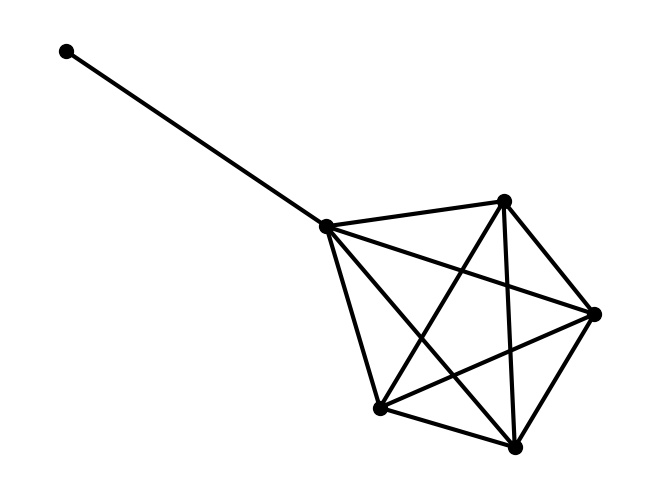

In [125]:
show_graph(components[0])

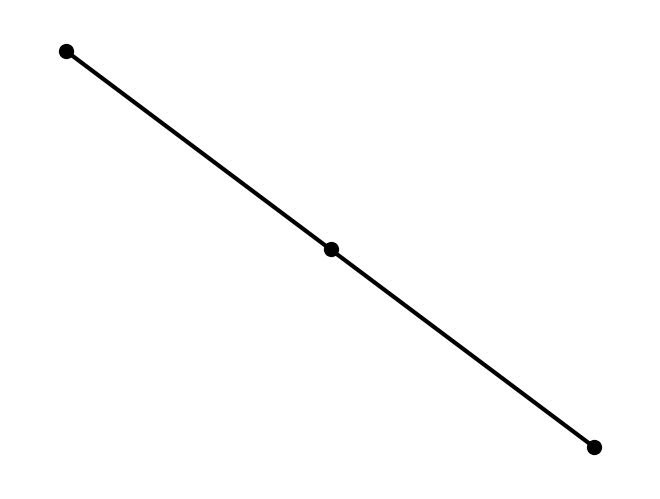

In [126]:
show_graph(components[1])